In [103]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
import keras

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Input
from mlxtend.plotting import plot_confusion_matrix
import pickle
import joblib


In [104]:


# Suppress all DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [105]:
## load data
dfheart = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dfheart.head()



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [106]:
## info for missing value and data type
dfheart.info()

## all variables contain no null value but complete
## all variable values are numeric 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [107]:
## Basic statistics summary of all variables in dataset
dfheart.describe()

## Age group covering from 40 to 95, missing youth
## mean Sex > 0.5, 14.88% more male interviewees

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


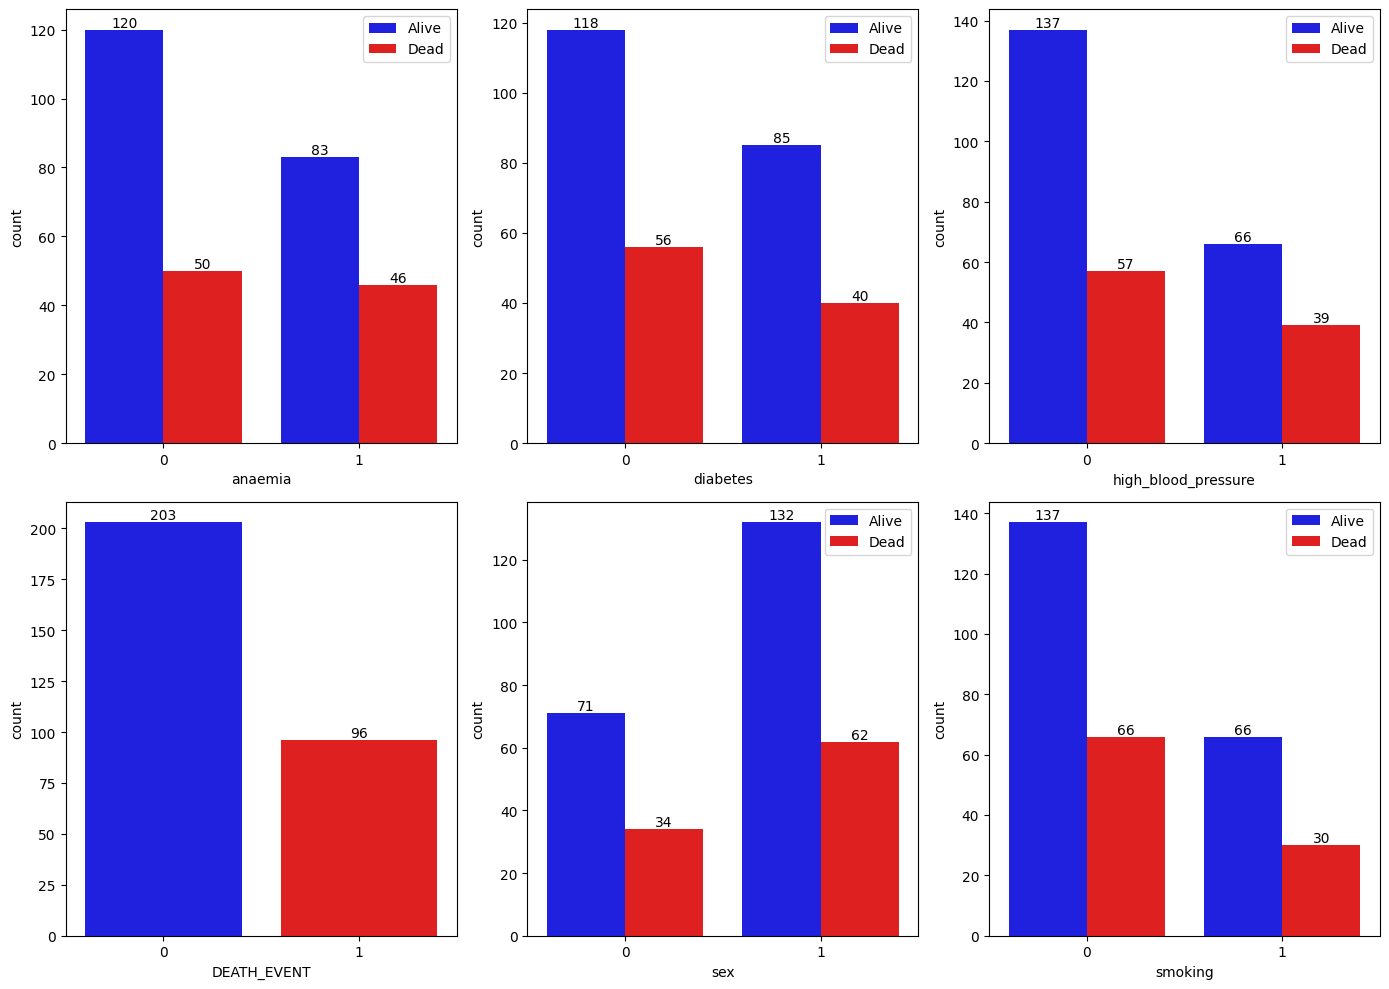

In [108]:

fig, ax = plt.subplots(2, 3, figsize=(14, 10))

# First row
sns.countplot(ax=ax[0, 0], data=dfheart, x="anaemia", hue="DEATH_EVENT", palette=["blue", "red"])
ax[0, 0].legend(['Alive', 'Dead'])
ax[0, 0].bar_label(ax[0, 0].containers[0])
ax[0, 0].bar_label(ax[0, 0].containers[1])

sns.countplot(ax=ax[0, 1], data=dfheart, x="diabetes", hue="DEATH_EVENT", palette=["blue", "red"])
ax[0, 1].legend(['Alive', 'Dead'])
ax[0, 1].bar_label(ax[0, 1].containers[0])
ax[0, 1].bar_label(ax[0, 1].containers[1])

sns.countplot(ax=ax[0, 2], data=dfheart, x="high_blood_pressure", hue="DEATH_EVENT", palette=["blue", "red"])
ax[0, 2].legend(['Alive', 'Dead'])
ax[0, 2].bar_label(ax[0, 2].containers[0])
ax[0, 2].bar_label(ax[0, 2].containers[1])

# Second row
sns.countplot(ax=ax[1, 0], data=dfheart, x="DEATH_EVENT", hue="DEATH_EVENT", palette=["blue", "red"], legend=False)
ax[1, 0].bar_label(ax[1, 0].containers[0])
ax[1, 0].bar_label(ax[1, 0].containers[1])

sns.countplot(ax=ax[1, 1], data=dfheart, x="sex", hue="DEATH_EVENT", palette=["blue", "red"])
ax[1, 1].legend(['Alive', 'Dead'])
ax[1, 1].bar_label(ax[1, 1].containers[0])
ax[1, 1].bar_label(ax[1, 1].containers[1])

sns.countplot(ax=ax[1, 2], data=dfheart, x="smoking", hue="DEATH_EVENT", palette=["blue", "red"])
ax[1, 2].legend(['Alive', 'Dead'])
ax[1, 2].bar_label(ax[1, 2].containers[0])
ax[1, 2].bar_label(ax[1, 2].containers[1])

plt.tight_layout()  
plt.show()


                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.

<Axes: >

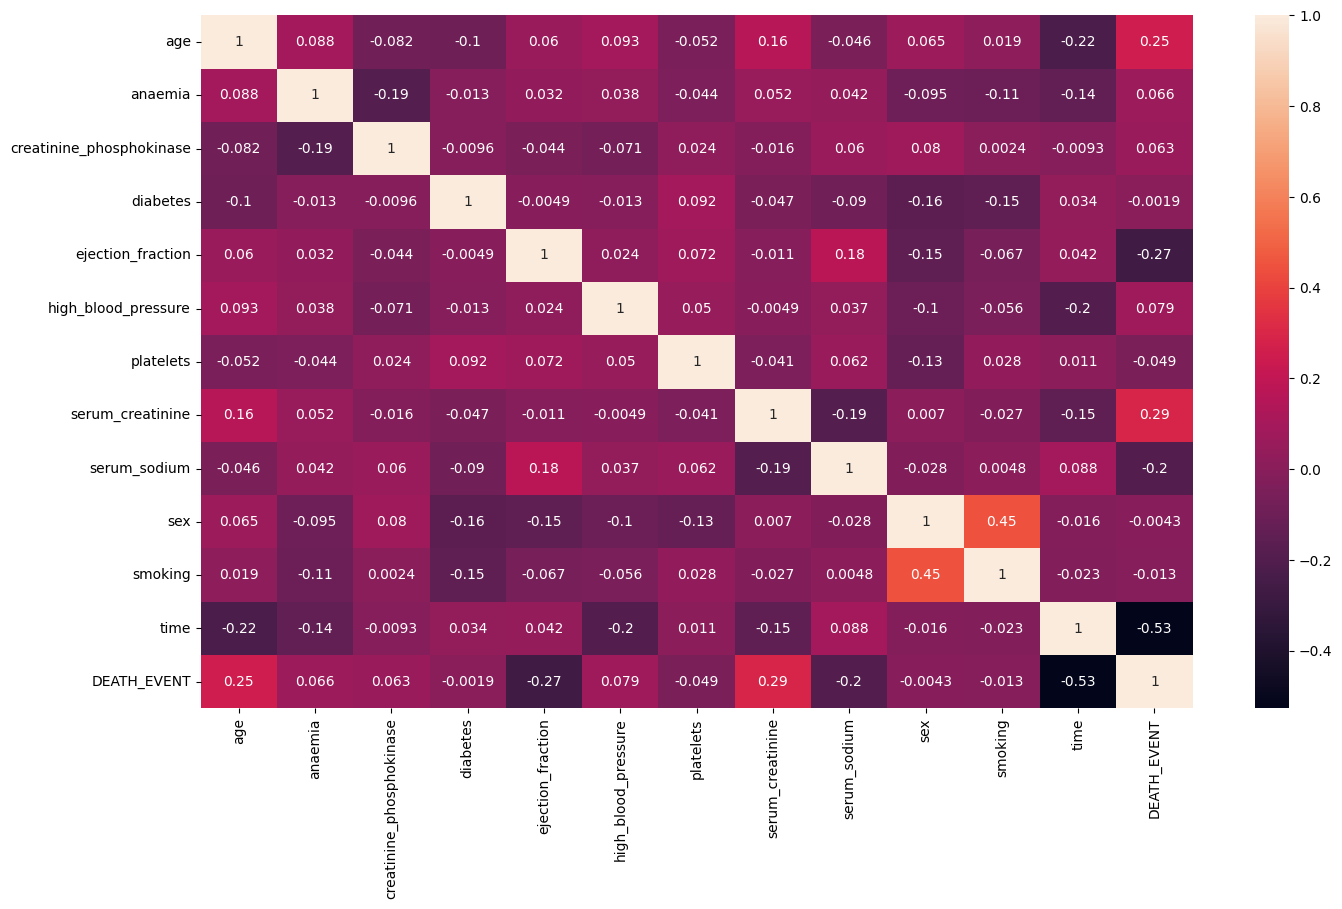

In [109]:
## Correlation Matrix
mt = dfheart.corr()
print(mt)
fig, ax=plt.subplots(figsize=(16,9))
sns.heatmap(mt, annot=True, square=False)

Text(0.5, 1.0, 'Age Distribution for Population Alive and Dead')

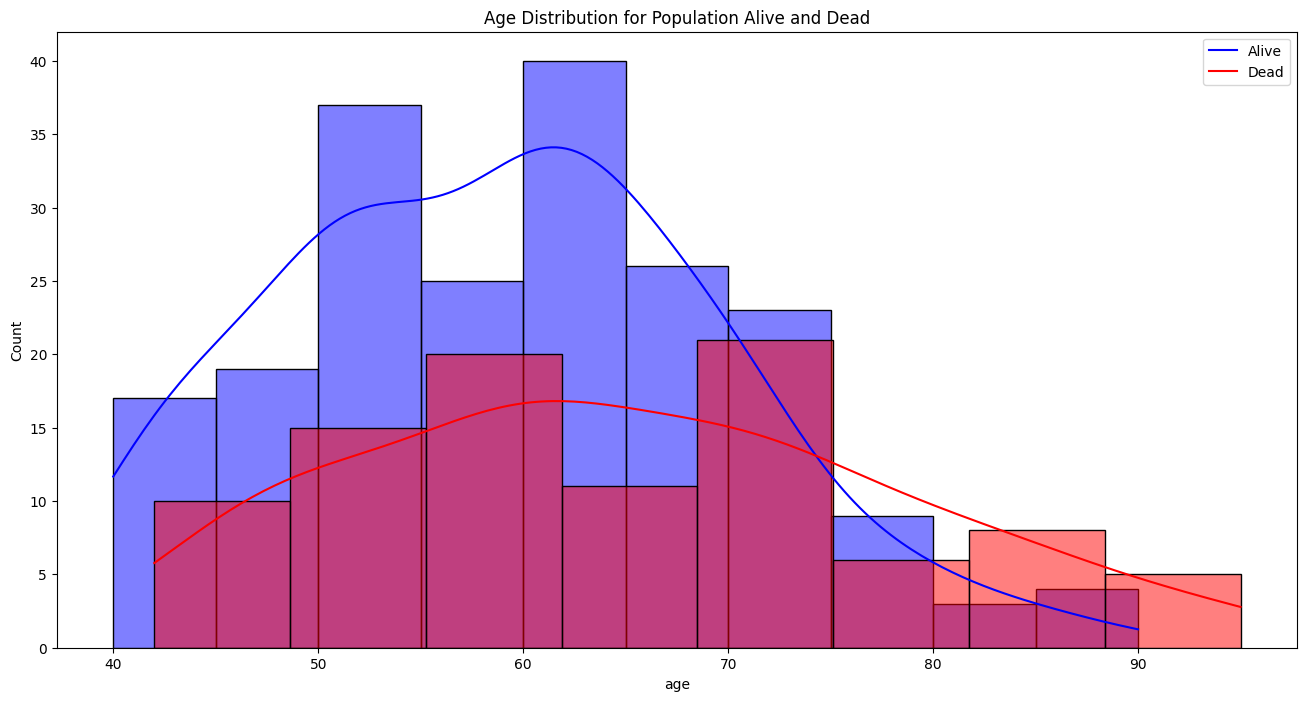

In [110]:
## Visualise the population age distribution between the alive and the dead
plt.figure(figsize=(16,8))
ax = sns.histplot(dfheart["age"][dfheart.DEATH_EVENT == 0], color="blue", kde=True), sns.histplot(dfheart["age"][dfheart.DEATH_EVENT == 1], color="red", kde=True)
plt.legend(['Alive', 'Dead'])
plt.title('Age Distribution for Population Alive and Dead')

## Older people are more likely to be dead than alive, the younger ones are in opposite situation
## however, the age data in general is not normally distributed given that it is right-skewed with big left tail, due to missing youth population data and extremely old outliers.

Text(0.5, 1.0, 'Follow-up Time Distribution for Population Alive and Dead')

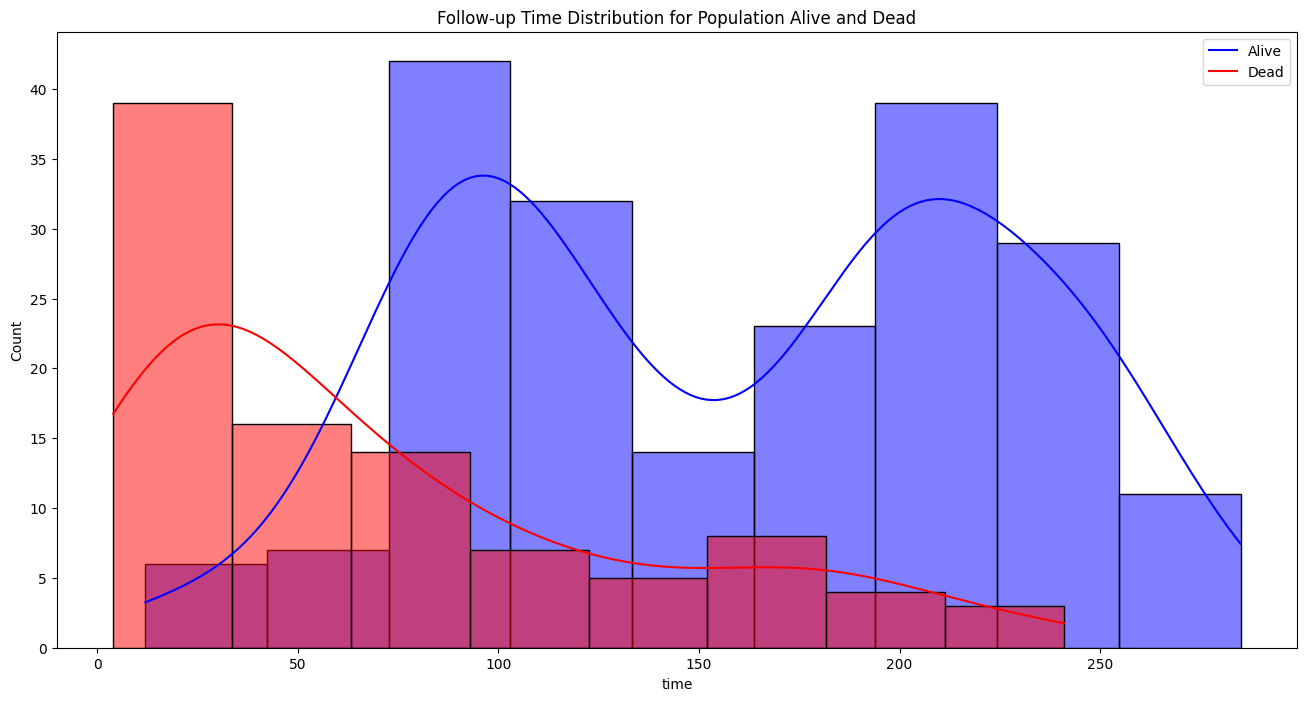

In [111]:
## Visualise the population follow-up time distribution between the alive and the dead
plt.figure(figsize=(16,8))
ax = sns.histplot(dfheart["time"][dfheart.DEATH_EVENT == 0], color="blue", kde=True), sns.histplot(dfheart["time"][dfheart.DEATH_EVENT == 1], color="red", kde=True)
plt.legend(['Alive', 'Dead'])
plt.title('Follow-up Time Distribution for Population Alive and Dead')

## Death cases are more likely to be rapid.

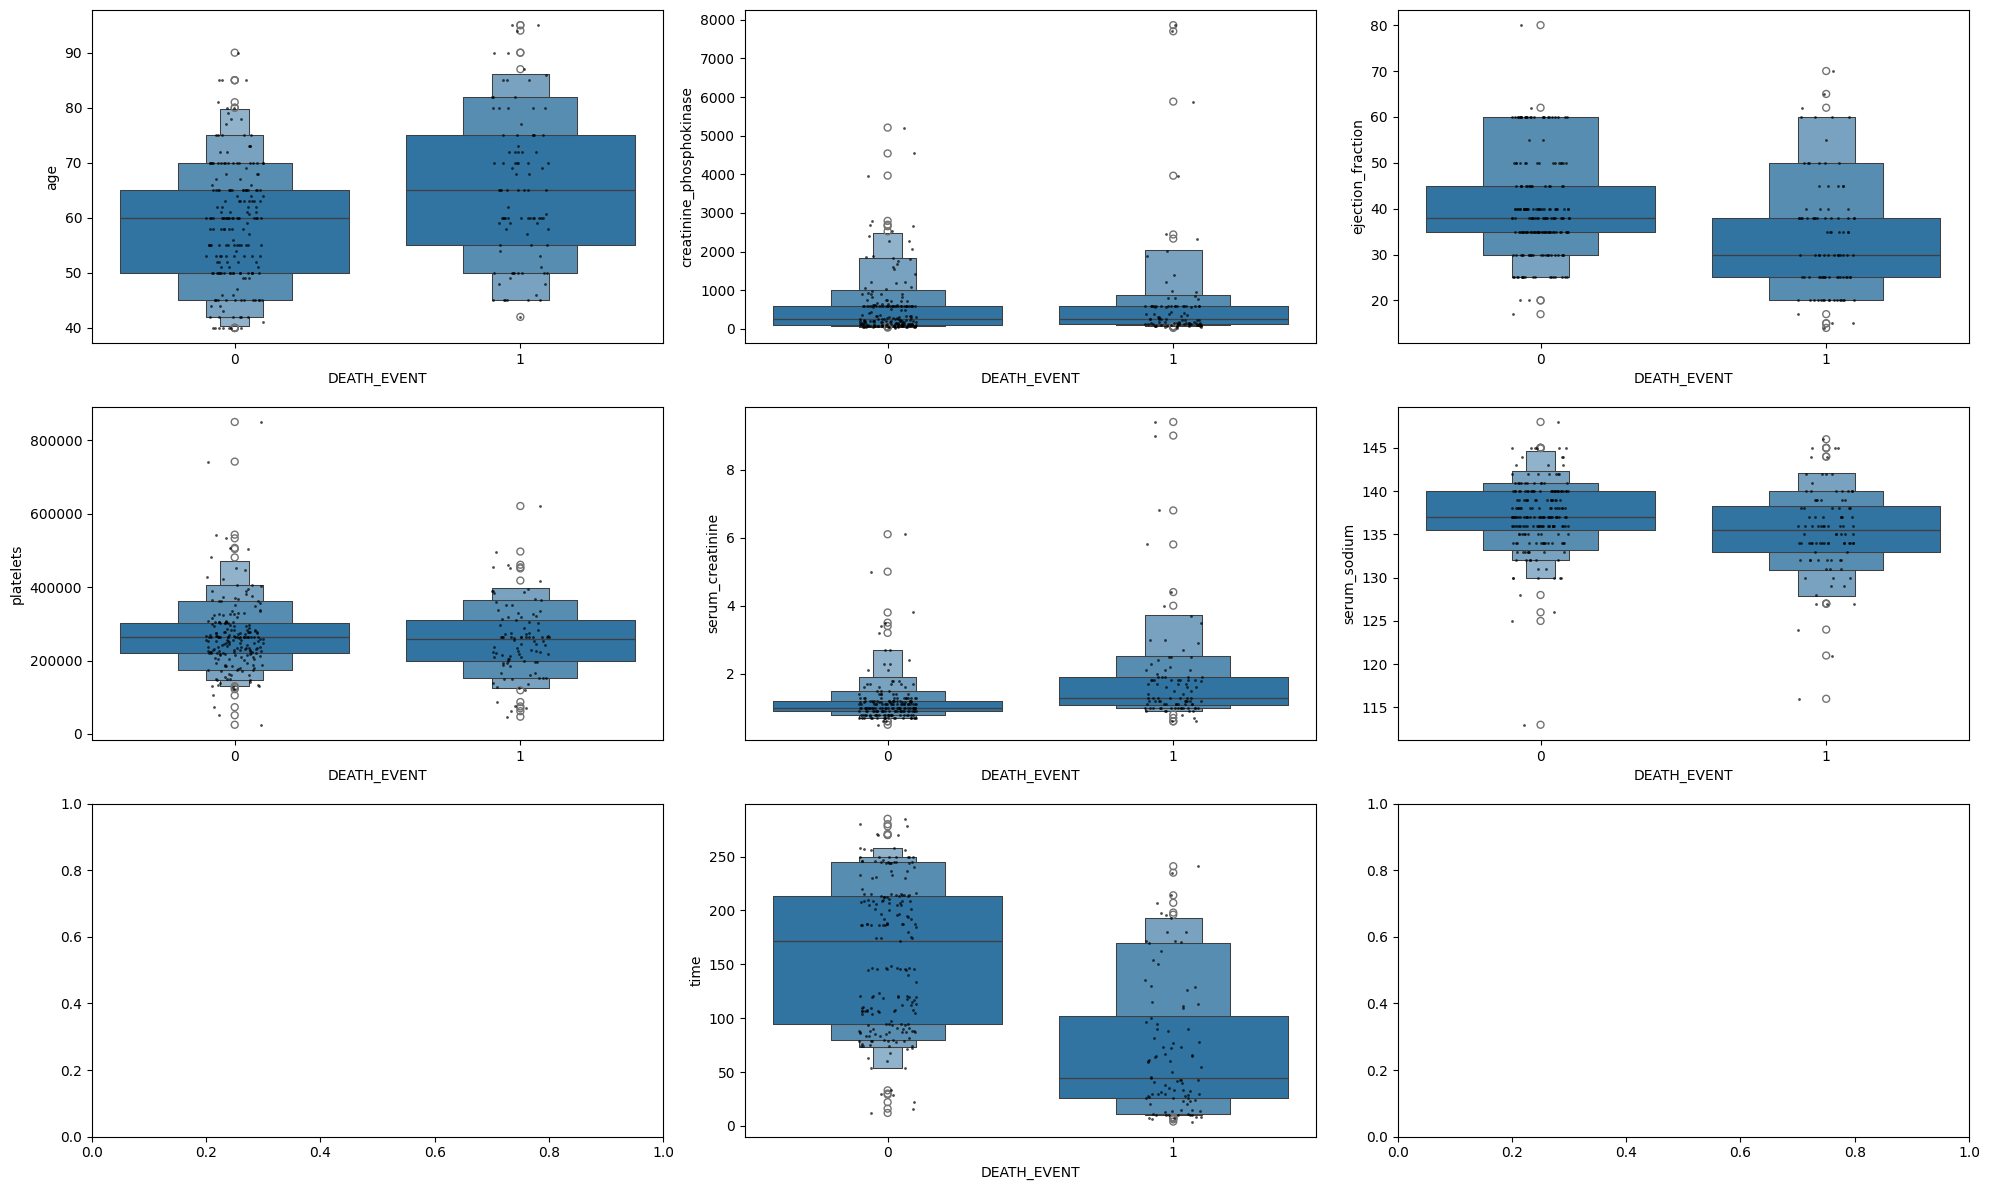

In [112]:
# Assuming dfheart is your DataFrame
fig, ax = plt.subplots(3, 3, figsize=(20, 12))  # Increased figure size for more room

# Swarmplot with adjusted marker size and reduced overlap
sns.stripplot(ax=ax[0, 0], x=dfheart["DEATH_EVENT"], y=dfheart["age"], color="black", alpha=0.7, size=2)  # Use stripplot and reduced size
sns.boxenplot(ax=ax[0, 0], x=dfheart["DEATH_EVENT"], y=dfheart["age"])

sns.stripplot(ax=ax[0, 1], x=dfheart["DEATH_EVENT"], y=dfheart["creatinine_phosphokinase"], color="black", alpha=0.7, size=2)
sns.boxenplot(ax=ax[0, 1], x=dfheart["DEATH_EVENT"], y=dfheart["creatinine_phosphokinase"])

sns.stripplot(ax=ax[0, 2], x=dfheart["DEATH_EVENT"], y=dfheart["ejection_fraction"], color="black", alpha=0.7, size=2)
sns.boxenplot(ax=ax[0, 2], x=dfheart["DEATH_EVENT"], y=dfheart["ejection_fraction"])

sns.stripplot(ax=ax[1, 0], x=dfheart["DEATH_EVENT"], y=dfheart["platelets"], color="black", alpha=0.7, size=2)
sns.boxenplot(ax=ax[1, 0], x=dfheart["DEATH_EVENT"], y=dfheart["platelets"])

sns.stripplot(ax=ax[1, 1], x=dfheart["DEATH_EVENT"], y=dfheart["serum_creatinine"], color="black", alpha=0.7, size=2)
sns.boxenplot(ax=ax[1, 1], x=dfheart["DEATH_EVENT"], y=dfheart["serum_creatinine"])

sns.stripplot(ax=ax[1, 2], x=dfheart["DEATH_EVENT"], y=dfheart["serum_sodium"], color="black", alpha=0.7, size=2)
sns.boxenplot(ax=ax[1, 2], x=dfheart["DEATH_EVENT"], y=dfheart["serum_sodium"])

# Use a sample of the data to reduce plot congestion for time
sns.stripplot(ax=ax[2, 1], x=dfheart["DEATH_EVENT"], y=dfheart["time"], color="black", alpha=0.7, size=2, data=dfheart.sample(100))
sns.boxenplot(ax=ax[2, 1], x=dfheart["DEATH_EVENT"], y=dfheart["time"])

plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()


In [113]:
## defining independent and dependent variables
x=dfheart.drop(["DEATH_EVENT"],axis=1)
y=dfheart["DEATH_EVENT"]


In [114]:

scaler = StandardScaler()

# Fit and transform the data
scale_x = scaler.fit_transform(x)


# Save the scaler to a file using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler has been re-saved successfully!")


Scaler has been re-saved successfully!


In [115]:
print(type(scaler))


<class 'sklearn.preprocessing._data.StandardScaler'>


In [116]:
## train-test split 
x_train, x_test, y_train,y_test = train_test_split(scale_x,y,test_size=0.4,random_state=23)

In [117]:
# Instantiating the SVM algorithm 
#Create a SVM Classifier
svm_linear = svm.SVC(kernel='linear')
svm_sigmoid = svm.SVC(kernel='sigmoid') 
svm_rbf = svm.SVC(kernel='rbf') 

# Fitting the model 
svm_linear.fit(x_train, y_train)
svm_sigmoid.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)

# Predicting the test variables
y_pred_linear = svm_linear.predict(x_test)
y_pred_sigmoid = svm_sigmoid.predict(x_test)
y_pred_rbf = svm_rbf.predict(x_test)

# Getting the score 
print("Linear Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("rbf kernelAccuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 0.7916666666666666
Sigmoid kernel Accuracy: 0.8083333333333333
rbf kernelAccuracy: 0.7833333333333333


In [118]:
# Save the svm model
with open('svm.pkl', 'wb') as f:
    pickle.dump(svm_linear, f)

print("model has been re-saved successfully!")


model has been re-saved successfully!


In [119]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})

,Actual,Predicted
184,1,0
110,1,0
159,0,0
221,0,0
14,0,1
...,...,...
234,0,0
225,0,0
267,0,0
200,0,0


In [120]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sigmoid})

,Actual,Predicted
184,1,0
110,1,0
159,0,0
221,0,0
14,0,0
...,...,...
234,0,0
225,0,0
267,0,0
200,0,0


In [121]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf})

,Actual,Predicted
184,1,0
110,1,0
159,0,0
221,0,0
14,0,1
...,...,...
234,0,0
225,0,0
267,0,0
200,0,0


In [122]:
## confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[70 12]
 [13 25]]
[[75  7]
 [16 22]]
[[74  8]
 [18 20]]


<Axes: >

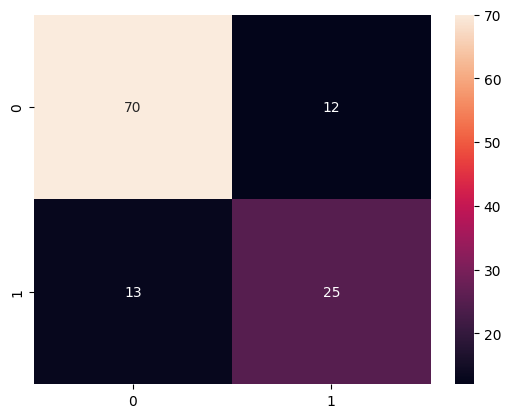

In [123]:
sns.heatmap(conf_mat_linear, annot=True, fmt='.0f')

In [124]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        82
           1       0.68      0.66      0.67        38

    accuracy                           0.79       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.79      0.79      0.79       120



In [125]:
auc = roc_auc_score(y_test, y_pred_linear)
print('AUC: %f' %auc)

AUC: 0.755777


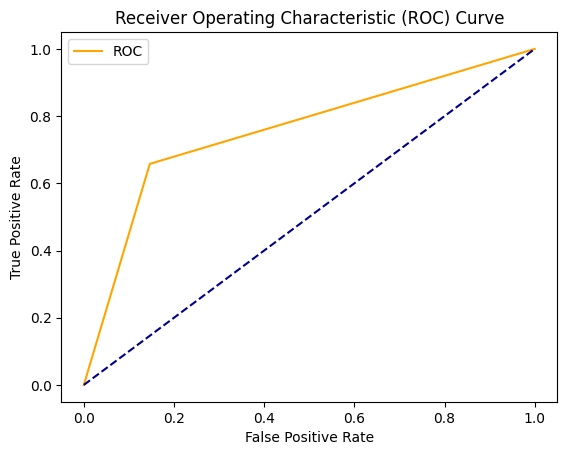

In [126]:
fpr, tpr = roc_curve(y_test, y_pred_linear)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [127]:
# Build a logiReg Model
model_lr = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
print(model_lr.coef_)
## accuracy score
print(accuracy_score(y_test,y_pred_lr))
## confusion matrix
mat = confusion_matrix(y_test, y_pred_lr)
print(mat)
print(classification_report(y_test,y_pred_lr))
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})

[[ 0.5559466   0.08194236  0.3764469   0.1398406  -0.85338447  0.04650698
  -0.34281474  1.01912125 -0.2731351  -0.41714128 -0.17910547 -1.34243291]]
0.775
[[71 11]
 [16 22]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        82
           1       0.67      0.58      0.62        38

    accuracy                           0.78       120
   macro avg       0.74      0.72      0.73       120
weighted avg       0.77      0.78      0.77       120



,Actual,Predicted
184,1,0
110,1,0
159,0,0
221,0,0
14,0,1
...,...,...
234,0,0
225,0,0
267,0,0
200,0,0


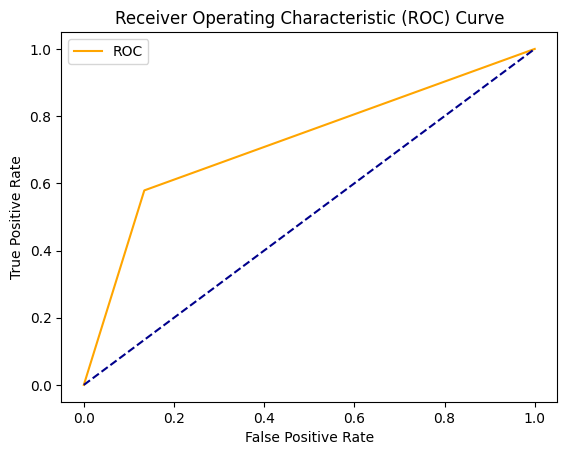

In [128]:
fpr, tpr = roc_curve(y_test, y_pred_lr)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [129]:
## Neural Network
## initialise the NN
model = Sequential()

## Set up the input/ visible layer
## One dimensional array with 12 elements (number for features)
## Array shape
model.add(Input(shape=(12,)))
## input layer
model.add(Dense(units= 50, kernel_initializer= 'uniform', activation = 'relu'))
## hidden layer 1
model.add(Dense(units= 20, kernel_initializer= 'uniform', activation = 'relu'))
##regularization 1
model.add(Dropout(0.4))
## hidden layer 2
model.add(Dense(units= 4, kernel_initializer= 'uniform', activation = 'relu'))
##regularization 2
model.add(Dropout(0.2))
## 0,1,2,3,4 ---- softfax
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN
## catergorical_crossentropy -- multi class classification

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

## model
history = model.fit(x_train, y_train, batch_size = 25, epochs = 80, validation_split=0.25)

Epoch 1/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6979 - loss: 0.6928 - val_accuracy: 0.5556 - val_loss: 0.6928
Epoch 2/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7038 - loss: 0.6915 - val_accuracy: 0.5556 - val_loss: 0.6924
Epoch 3/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7180 - loss: 0.6898 - val_accuracy: 0.5556 - val_loss: 0.6919
Epoch 4/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7054 - loss: 0.6884 - val_accuracy: 0.5556 - val_loss: 0.6914
Epoch 5/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7314 - loss: 0.6858 - val_accuracy: 0.5556 - val_loss: 0.6906
Epoch 6/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7382 - loss: 0.6829 - val_accuracy: 0.5556 - val_loss: 0.6894
Epoch 7/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7515 - loss: 0.6787 - val_accuracy: 0.5556 - val_loss: 0.6875
Epoch 8/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7305 - loss: 0.6748 - val_accuracy: 0.5556 - val_loss: 0.6845
Epoch 9

In [130]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 64.78%


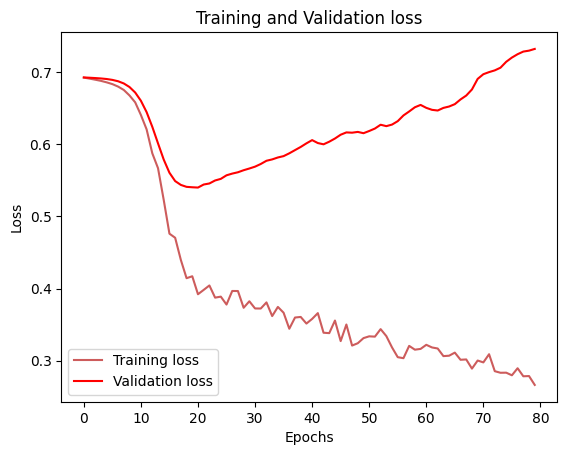

In [131]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

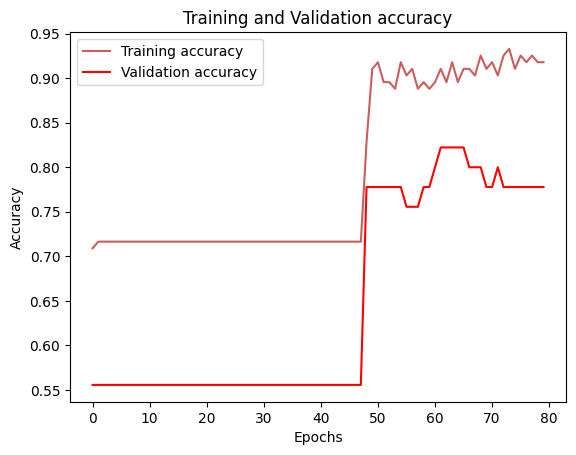

In [132]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [133]:
# Predicting the test set results
y_pred = model.predict(x_test)
y_pred = np.where(y_pred > 0.4, 1, 0)
np.set_printoptions()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


<Axes: >

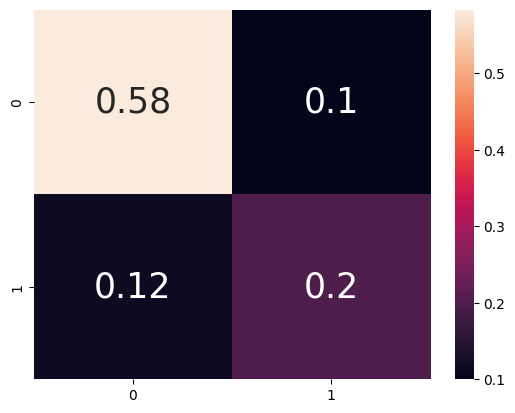

In [134]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':25})

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        82
           1       0.67      0.63      0.65        38

    accuracy                           0.78       120
   macro avg       0.75      0.74      0.75       120
weighted avg       0.78      0.78      0.78       120



In [136]:
## save the ann model
keras.saving.save_model(model, 'heart_disease.keras')